#### This program will predict whether a person will survive on the titanic or not. The data set is in-built, from seaborn. 

Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Imported the data set, and performed some analysis to get information about the data set, like its shape, etc.

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [5]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

Here we do a countplot on the survived column

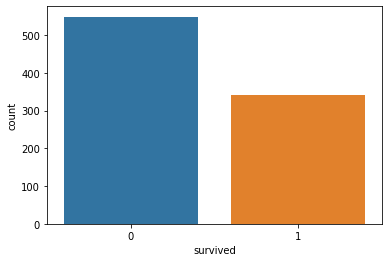

In [6]:
sns.countplot(titanic['survived'])

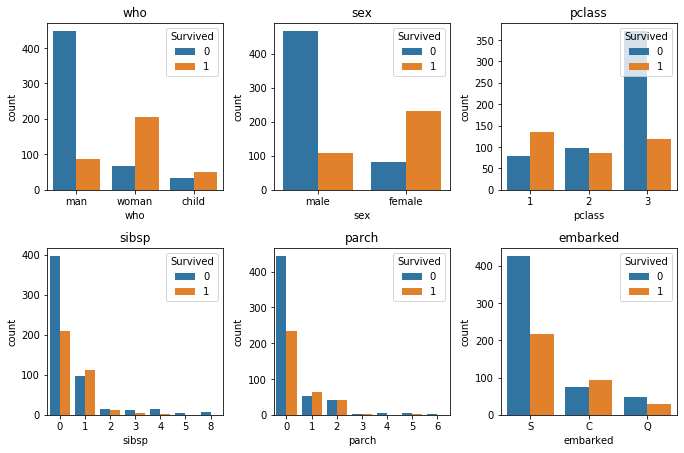

In [7]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
n_rows = 2
n_cols = 3
fig,axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows*3.2))
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    ax = axs[r][c]
    sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='Survived', loc="upper right")
plt.tight_layout()
plt.show()

In [8]:
titanic.groupby('sex')[['survived']].mean()

survived
sex             
female  0.742038
male    0.188908

The above results show that 74.2% of the females survived the sinking of titanic while only 18.89% of the men survived the incident.

In [9]:
titanic.pivot_table('survived', index='sex', columns='class')

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

Here we see the survival rates among men and women based off the class. As evident, Survival rates among women in first, second and third classes were 96%, 92% and 50% respectively while amongst men it was 36.8%, 15.74% and 13.54% in first, second and third classes respectively.  

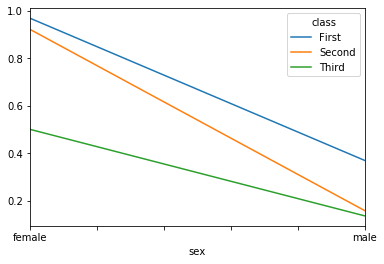

In [10]:
titanic.pivot_table('survived', index='sex', columns='class').plot()

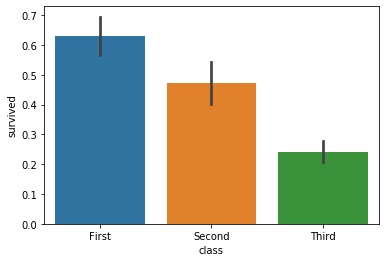

In [11]:
#Now as we a lot of columns in this data set are categorical example class, sex, survived, etc.
sns.barplot(x='class', y='survived', data= titanic)

In [12]:
age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived', ['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

From the above we understand that:
1. If you are a woman aged 0-18, your chances of survival is 90.9% in first class, 100% in second class and 51.16% in third class
2. If you are a woman aged 18-80, your chances of survival is 97.29% in first class, 90% in second class and 42.37% in third class
3. If you are a man aged 0-18, your chances of survival is 80% in first class, 60% in second class and 21.56% in third class
4. If you are a man aged 18-80, your chances of survival is 37.50% in first class, 7.14% in second class and 13.36% in third class

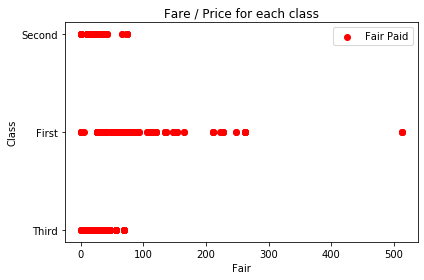

In [13]:
#Now lets see the fare paid for each class
plt.scatter(x = titanic['fare'], y = titanic['class'], color = 'red', label = 'Fair Paid')
plt.ylabel('Class')
plt.xlabel('Fair')
plt.title('Fare / Price for each class')
plt.legend()
plt.tight_layout()
plt.show()

Each dot is a passenger, we can see some people have paid over 500 British pounds for first class, some paid nothing, and those who have paid over 100 pounds are seemingly in first class

In [14]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Age is missing 177 values, Embarked is missing 2 values, deck is missing 688 values and embark_town is missing 2 values.

In [15]:
titanic.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

In [16]:
for val in titanic:
  print(titanic[val].value_counts())
  print()


0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [17]:
#DROPPING THE UNNECESSARY COLUMNS
titanic = titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'], axis=1)


In [18]:
#DROP EMPTY ROWS
titanic = titanic.dropna(subset=['embarked','age'])

In [19]:
titanic.shape

(712, 8)

In [20]:
titanic.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked
0          0       3    male  22.0      1      0   7.2500        S
1          1       1  female  38.0      1      0  71.2833        C
2          1       3  female  26.0      0      0   7.9250        S
3          1       1  female  35.0      1      0  53.1000        S
4          0       3    male  35.0      0      0   8.0500        S
6          0       1    male  54.0      0      0  51.8625        S
7          0       3    male   2.0      3      1  21.0750        S
8          1       3  female  27.0      0      2  11.1333        S
9          1       2  female  14.0      1      0  30.0708        C
10         1       3  female   4.0      1      1  16.7000        S

In [21]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [22]:
print(titanic['sex'].nunique())
print(titanic['embarked'].nunique())

2
3


In [23]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#ENCODING THE EMBARKED COLUMN
titanic.iloc[:, 7] = labelencoder.fit_transform( titanic.iloc[:, 7].values )

#ENCODING THE SEX COLUMN
titanic.iloc[:, 2] = labelencoder.fit_transform( titanic.iloc[:, 2].values )

In [25]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


We get 0 for female, 1 for male
2 for S, 0 for C and 1 for Q

In [26]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [27]:
titanic.head(10)

survived  pclass  sex   age  sibsp  parch     fare  embarked
0          0       3    1  22.0      1      0   7.2500         2
1          1       1    0  38.0      1      0  71.2833         0
2          1       3    0  26.0      0      0   7.9250         2
3          1       1    0  35.0      1      0  53.1000         2
4          0       3    1  35.0      0      0   8.0500         2
6          0       1    1  54.0      0      0  51.8625         2
7          0       3    1   2.0      3      1  21.0750         2
8          1       3    0  27.0      0      2  11.1333         2
9          1       2    0  14.0      1      0  30.0708         0
10         1       3    0   4.0      1      1  16.7000         2

Now we grab the independent and the dependent variables

In [28]:
X = titanic.iloc[:, 1:8].values
y = titanic.iloc[:, 0].values

Split data set into training and testing data

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
#SCALE THE DATA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.fit_transform(X_test)


In [31]:
#Creating functions with Machine Learning Models
def models(X_train, y_train):
    #Using Logistic Regression#
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Use KNeighbours
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p=2)
    knn.fit(X_train, y_train)
    
    #SVC 
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, y_train)
    
    #SVC RBF Kernel
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, y_train)
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #Using Decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, y_train)
    
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)
    
    print("Logistic Regression Accuracy = ", log.score(X_train, y_train))
    print("KNeighbours Accuracy = ", knn.score(X_train, y_train))
    print("SVC Linear Accuracy = ", svc_lin.score(X_train, y_train))
    print("SVC RBF Accuracy= ", svc_rbf.score(X_train, y_train))
    print("GaussianNB Accuracy = ", gauss.score(X_train, y_train))
    print("DecisionTreeClassifier Accuracy = ", tree.score(X_train, y_train))
    print("RandomForestClassifier Accuracy = ", forest.score(X_train, y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest
    

In [32]:
model = models(X_train, y_train)

C:\Users\vedan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Accuracy =  0.7978910369068541
KNeighbours Accuracy =  0.8664323374340949
SVC Linear Accuracy =  0.7768014059753954
SVC RBF Accuracy=  0.8506151142355008
GaussianNB Accuracy =  0.8031634446397188
DecisionTreeClassifier Accuracy =  0.9929701230228472
RandomForestClassifier Accuracy =  0.9753954305799648


In [33]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    
    #Extract True +ve, True -ve, False +ve, False -ve
    tn, fp, fn, tp = cm.ravel()
    t_score = (tp + tn)/(tp + tn + fp + fn)
    
    print(cm)
    print('Model no.{} testing accuracy = "{}"'.format(i, t_score))
    print()

[[75  7]
 [19 42]]
Model no.0 testing accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model no.1 testing accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model no.2 testing accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model no.3 testing accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model no.4 testing accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model no.5 testing accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model no.6 testing accuracy = "0.8391608391608392"



Model 6, has the best accuracy, and Model no.6, the corresponding is Random Forest Classifier.
It performed the second best on the training data, and the best on the testing data

In [34]:
#Predicting random forest classifier
pred = model[6].predict(X_test)
print(pred)

print()

#Printing the actual values
print(y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


Now we will check our own chances of survival

In [35]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [41]:

my_vals =[[1,0,16,8,6,350,1]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival = sc.fit_transform(my_vals)

#Print the prediction of My survival chances

pred = model[6].predict(my_vals)
if pred == 0:
    print("You have zero chances of survival")
else:
    print("You may survive this event")
    

You have zero chances of survival
